In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
df = pd.read_csv('C:/Users/brijm/OneDrive/Documents/ML assignment/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
print(df.isnull().sum())


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


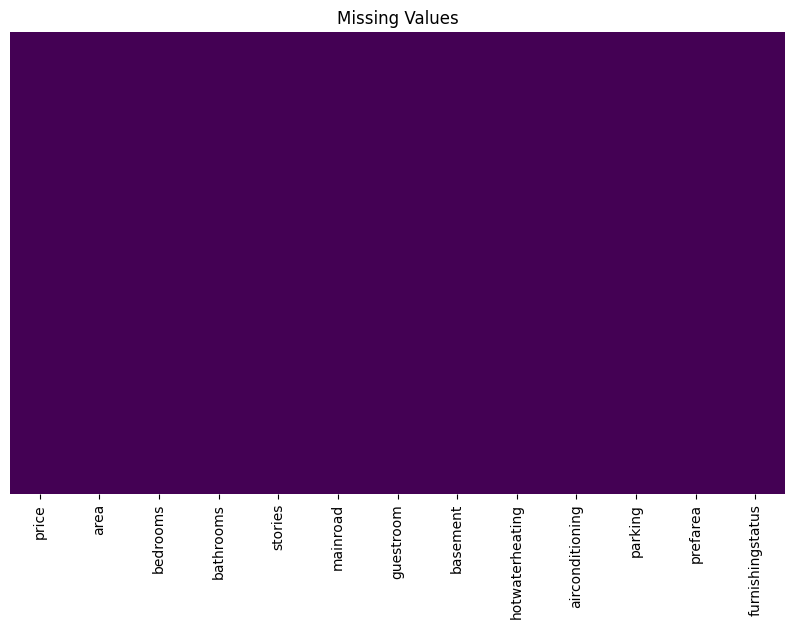

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values")
plt.show()

In [15]:
y=df['price']
x=df[['area']]
print(x,y)

     area
0    7420
1    8960
2    9960
3    7500
4    7420
..    ...
540  3000
541  2400
542  3620
543  2910
544  3850

[545 rows x 1 columns] 0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(X_train, X_test, y_train, y_test)

      area
542   3620
496   4000
484   3040
507   3600
252   9860
..     ...
70    4000
277  10360
9     5750
359   3600
192   6600

[436 rows x 1 columns]       area
239   4000
113   9620
325   3460
66   13200
479   3660
..     ...
76    6420
132   5200
311   6060
464   4500
155   6100

[109 rows x 1 columns] 542    1750000
496    2695000
484    2870000
507    2590000
252    4515000
        ...   
70     6790000
277    4305000
9      9800000
359    3710000
192    5040000
Name: price, Length: 436, dtype: int64 239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
        ...   
76     6650000
132    5810000
311    4123000
464    3080000
155    5530000
Name: price, Length: 109, dtype: int64


In [17]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = regressor.predict(X_test)

In [19]:
m = regressor.intercept_
m

np.float64(2329244.913495151)

In [20]:
c = regressor.coef_[0]
c

np.float64(475.26784571114615)

In [21]:
print("Slope: ",m," Coefficient: ",c)

Slope:  2329244.913495151  Coefficient:  475.26784571114615


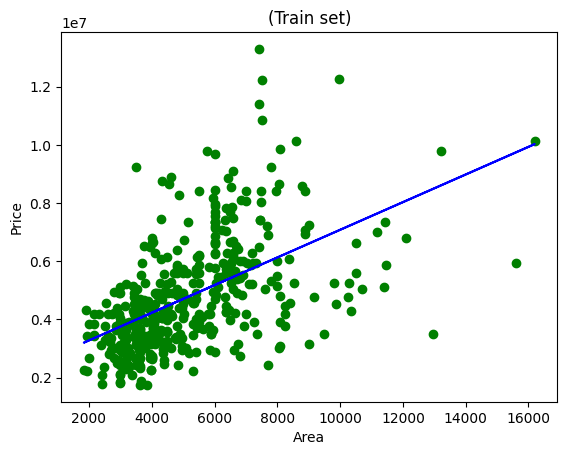

In [23]:
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('(Train set)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

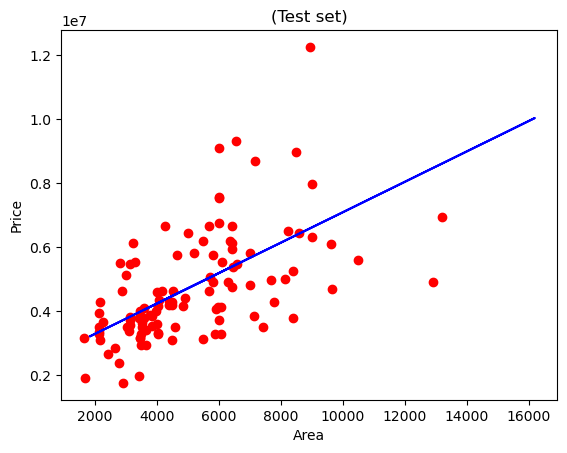

In [41]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('(Test set)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [24]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error:", rmse)
print("R-Squared Score:", r2)

Root Mean Squared Error: 1413390.3819384389
R-Squared Score: 0.3067292122216638
